In [2]:
import os
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

C:\Users\ichwa\AppData\Local\Temp\ipykernel_6192\2250171276.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Keterangan dari output imread (360, 480, 3):

plt.imread dan cv.imread menghasilkan numpy array.

| column | description |
| --- | --- |
| 360 | Height(tinggi) |
| 480 | Width(lebar) |
| 3 | Chanels |

In [3]:
# reading images from folder ./dataset/frames/1506/*.jpg
dict_1506 = [f for f in os.listdir('./dataset/frames/1506/') if f.endswith('.jpg')]

img_mpl = plt.imread('./dataset/frames/1506/' + dict_1506[0])
img_cv2 = cv.imread('./dataset/frames/1506/' + dict_1506[0])

img_mpl.shape, img_cv2.shape

((360, 480, 3), (360, 480, 3))

<Axes: title={'center': 'Pixel distribution (matplotlib)'}, ylabel='Frequency'>

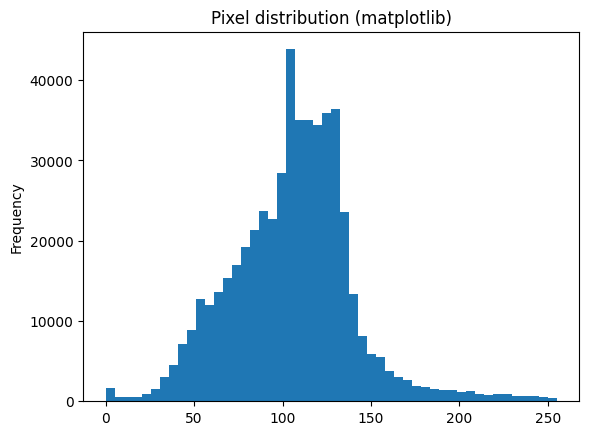

In [4]:
pd.Series(img_mpl.flatten()).plot(kind = 'hist',
                                  bins=50,
                                  title='Pixel distribution (matplotlib)')

Display Images

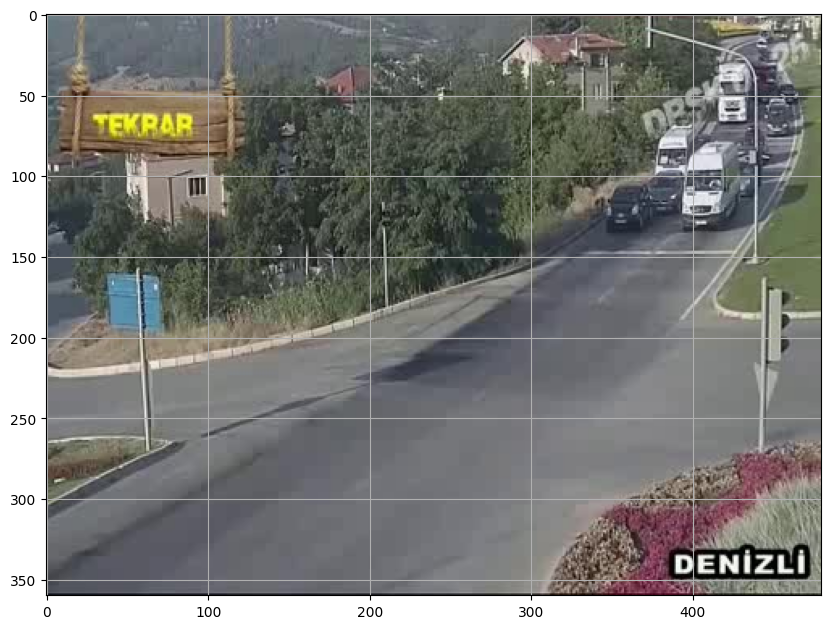

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
ax.grid(True)
plt.show()

Image Chanels (RGB)

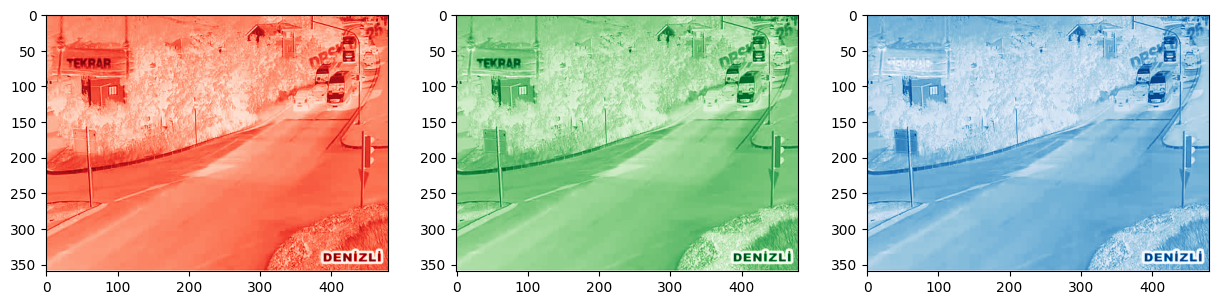

In [6]:
fig,axs =   plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
plt.show()

matplotlib vs cv2 np arrays
1. cv2 reads in chanels as BGR
2. matplotlib reads in chanes as RGB

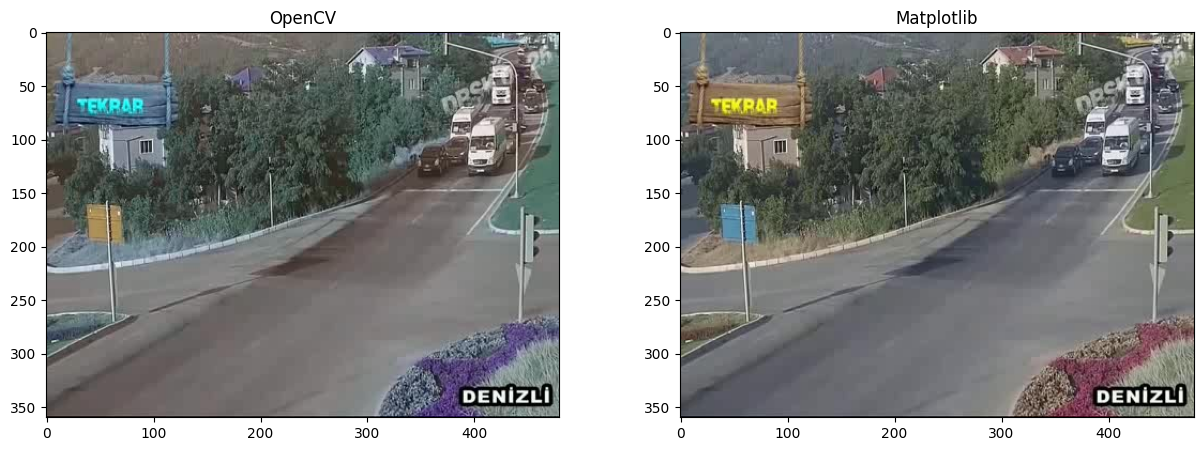

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].set_title('OpenCV')
axs[1].set_title('Matplotlib')
plt.show()

Convert color BGR to RGB

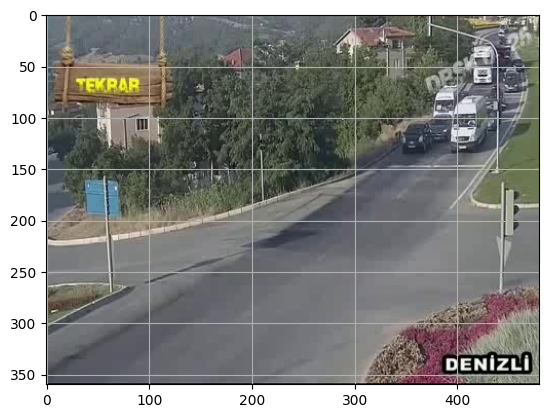

In [8]:

img_rgb = cv.cvtColor(img_cv2, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_rgb)
ax.grid(True)
plt.show()

Image manipulation

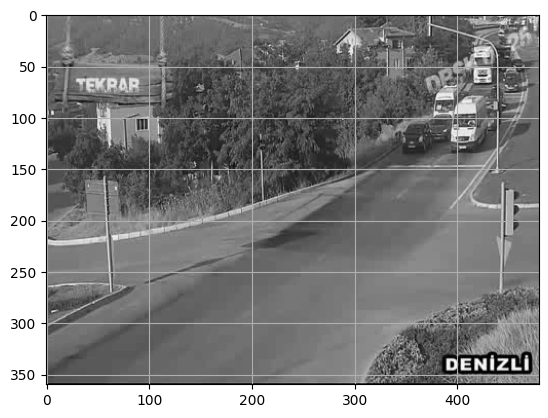

In [9]:
image_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
fig, ax = plt.subplots()
ax.imshow(image_gray, cmap='gray')
ax.grid(True)
plt.show()

Resize and scalling

(90, 120, 3)


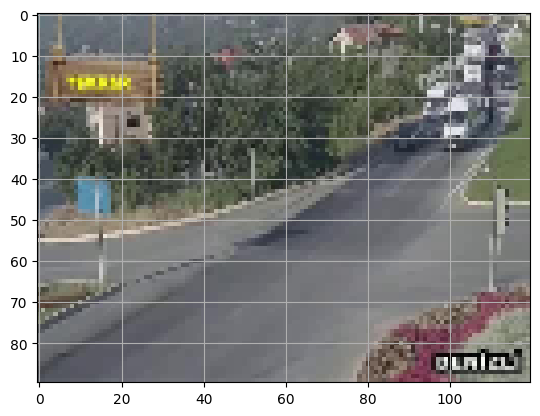

In [10]:
image_resized = cv.resize(img_rgb, None, fx=.25, fy=.25)
fig, ax = plt.subplots()
ax.imshow(image_resized)
ax.grid(True)
print(image_resized.shape)
plt.show()

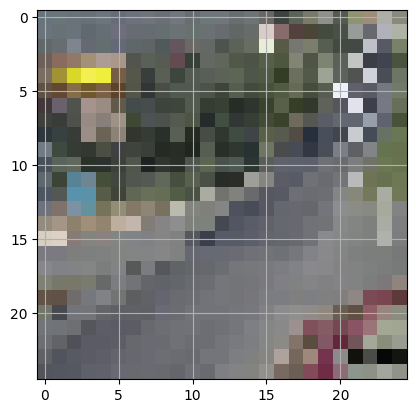

In [11]:
image_resize_different = cv.resize(img_rgb,(25,25))
fig, ax = plt.subplots()
ax.imshow(image_resize_different)
ax.grid(True)
plt.show()

Upscale

(5000, 5000, 3) (360, 480, 3)


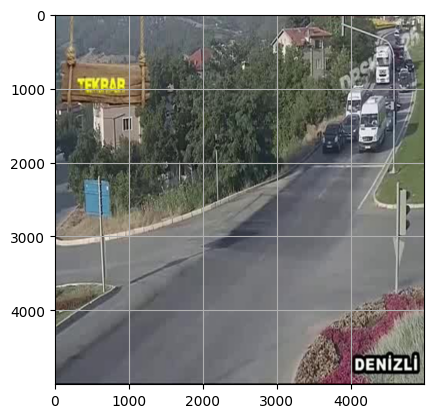

In [12]:
img_upscale =  cv.resize(img_rgb, (5000,5000), interpolation=cv.INTER_CUBIC)
fig, ax = plt.subplots()
ax.imshow(img_upscale)
ax.grid(True)
print(img_upscale.shape, img_rgb.shape)
plt.show()

Sharp & Blurring


CV2 Kernels:

![cv2_kernels](assets/img/cv2_kernels.png)

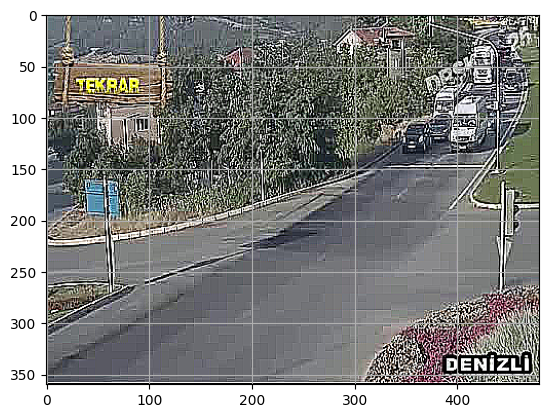

In [13]:
#sharp
kernel_sharp = np.array([[-1,-1,-1],
                         [-1,9,-1],
                         [-1,-1,-1]])

img_sharp = cv.filter2D(img_rgb, -1, kernel_sharp)
fig, ax = plt.subplots()
ax.imshow(img_sharp)
ax.grid(True)
plt.show()

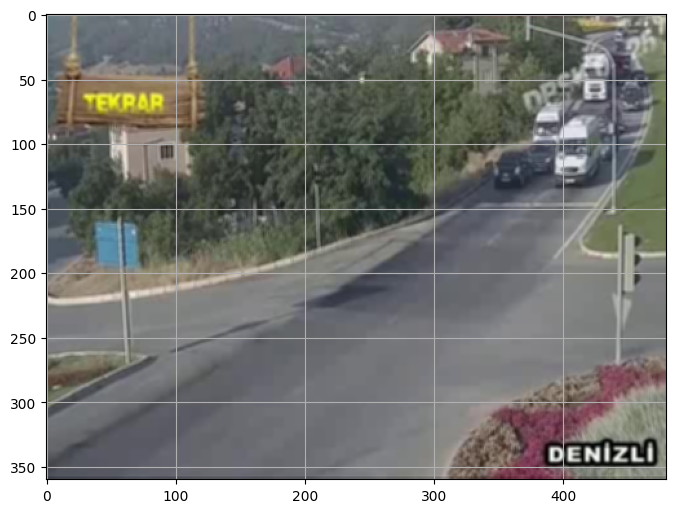

In [14]:
# Blurring
kernel_3x3 = np.ones((3,3), np.float32) / 9
img_blur = cv.filter2D(img_rgb, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img_blur)
ax.grid(True)
plt.show()

(360, 480) (360, 480)


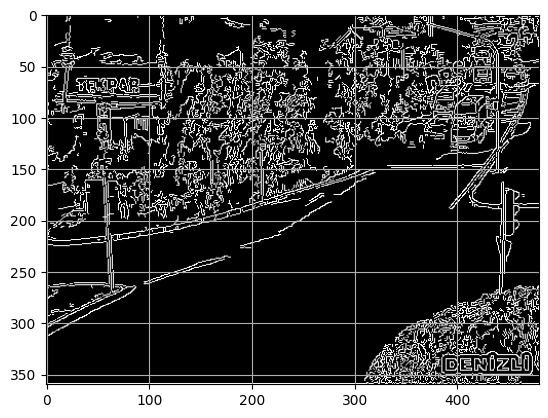

In [15]:
# Edge detection
img_gray = np.array(cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY))
img_edges = cv.Canny(img_gray, 100, 200)
fig, ax = plt.subplots()
ax.imshow(img_edges, cmap='gray')
ax.grid(True)
print(image_gray.shape, img_edges.shape)
plt.show()